# LAB 7 & 8

This report shows how and event selection optimization is performed using a set of Higgs boson training data. 
When the event selection is performed on a data set, the signal discovery sensitivity is optimized which ultimately enhances our signal analysis.


In [202]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Importing training data

In [203]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

# list all keys of the files
#higgs.keys()

In [204]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile2)

# list all keys of the files
#qcd.keys()

In [205]:
# first plot the signal data then plot the background data

start = 0 
end = higgs.size

pt = higgs['pt'][start:end]
eta = higgs['eta'][start:end]
phi = higgs['phi'][start:end]
mass = higgs['mass'][start:end]
ee2 = higgs['ee2'][start:end]
ee3 = higgs['ee3'][start:end]
d2 = higgs['d2'][start:end]
angularity = higgs['angularity'][start:end]
t1 = higgs['t1'][start:end]
t2 = higgs['t2'][start:end]
t3 = higgs['t3'][start:end]
t21 = higgs['t21'][start:end]
t32 = higgs['t32'][start:end]
delta_R = higgs['KtDeltaR'][start:end]

In [206]:
pt_bkg = qcd['pt'][start:end]
eta_bkg = qcd['eta'][start:end]
phi_bkg = qcd['phi'][start:end]
mass_bkg = qcd['mass'][start:end]
ee2_bkg = qcd['ee2'][start:end]
ee3_bkg = qcd['ee3'][start:end]
d2_bkg = qcd['d2'][start:end]
angularity_bkg = qcd['angularity'][start:end]
t1_bkg = qcd['t1'][start:end]
t2_bkg = qcd['t2'][start:end]
t3_bkg = qcd['t3'][start:end]
t21_bkg = qcd['t21'][start:end]
t32_bkg = qcd['t32'][start:end]
delta_R_bkg = qcd['KtDeltaR'][start:end]

### Stacked Histogram for the variable, mass

For the low Pt data, the expected number of Higgs event is equal to 100. This is the signal value to be used against the background qcd that has a poisson distribution with mean value equivalentis the expected number of background event equal to 20,000.

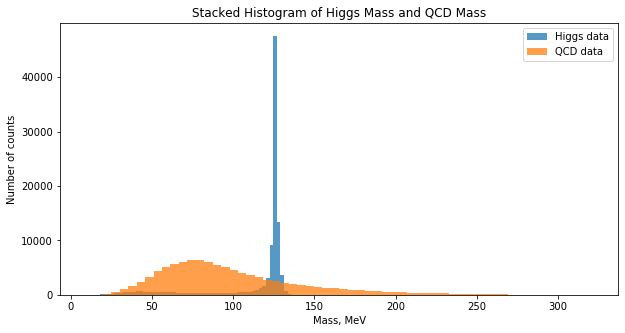

In [207]:
#Stacked histogram
fig, axes = plt.subplots(figsize=(10,5))
alpha = 0.75
bin = 60

plt. hist(mass, bins = bin, alpha = alpha, label = "Higgs data" )
plt. hist(mass_bkg, bins = bin, alpha = alpha, label = "QCD data")
plt.xlabel("Mass, MeV")
plt.ylabel("Number of counts")
plt.title("Stacked Histogram of Higgs Mass and QCD Mass")
plt.legend();

### Calculate the signal signicance without any event selection

In [208]:
# The distribution of the background is a poisson with mu = 20000
N_qcd = 20000
x = range(0,N_qcd+1000)
mu = 20000
dist_bkg = stats.poisson.pmf(x, mu)

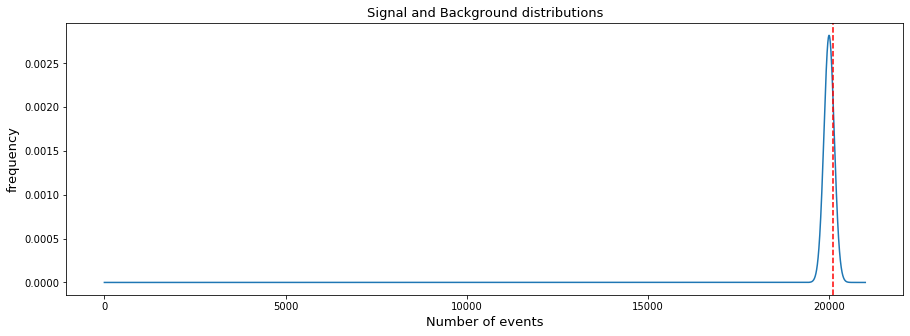

In [209]:
fig, axes = plt.subplots(figsize=(15,5))
size = 13
N_higgs = 100
signal = N_higgs + mu

axes.plot(dist_bkg)
axes.axvline(signal, color='r', linestyle="--")
axes.set_xlabel('Number of events', fontsize = size)
axes.set_ylabel('frequency', fontsize = size)
axes.set_title('Signal and Background distributions', fontsize = size);

The above plot shows the Expected yields of background qcd and the expected yields of signal.

The below calculation show how to assess the significance of the signal when no event selection has been made. To get relevant signal significance with the given background distribution, the signal, which is the expected yields of the number of Higgs event is inflated by the expected yields of the number of background qcd. 

The typical calculation of the significance of of the signal would be to calculate the integrated probability of that signal using the poisson distribution and to convert that probaiblity to the sigma using the normal distribution.

In [210]:
prob = stats.poisson.cdf(signal, N_qcd)
print('The probability  = {:.2%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('The signal significance is = {:.2f}'.format(sigma))


The probability  = 76.15%
The signal significance is = 0.71


In [211]:
N_higgs =  100
N_qcd = 20000
ratio = N_higgs/np.sqrt(N_qcd)
print('The significance  = {:.2f}'.format(ratio))

The significance  = 0.71


The above calcuation shows a simpler way to calculate the significance of the signal. As you can see here, the ratio of expected yields of the number of the Higgs event to the square root of the expected yields of the number of the background qcd is equivalent to the significance of the signal calculated using a poisson distribution. This means that this ratio can be used to calculate the significance of the signal.


However, the significance of the signal, N(Higgs) = 100, is 0.71. Without any event selection, the signal is not significant enough to be distinguished from the background. In this case, no discovery will be made.

# Using invariant mass to perform the first event selection by cutting the training data

As the histrogram of the Higgs mass and the qcd mass shows, the qcd mass distribution is much flatter and spread out compared to the Higgs mass distribution. Based on this behavior of each data, we can make a cut to the data to improve the significance of the signal.

### Try different mass cuts

#### Cut1 : cut the data at mass = 100 and 150

In [212]:
counts = np.bincount(mass)
print('The mean value of the mass = ',np.argmax(counts))

The mean value of the mass =  125


In [213]:
mean_value = np.argmax(counts)
n = 25
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [214]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = mass_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 84.95
The new expected yield number of qcd event = 5181.00

The significance after the 1st cut = 1.18


#### Cut2: cut the data at mass = 110 and 140

In [215]:
n = 15
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [216]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = mass_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 82.79
The new expected yield number of qcd event = 3015.20

The significance after the 1st cut = 1.51


#### Cut3: cut the data at mass = 120 and 130

In [217]:
n = 5
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [218]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = mass_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 75.85
The new expected yield number of qcd event = 980.20

The significance after the 1st cut = 2.42


#### Cut4: cut the data at mass = 123 and 127

In [219]:
n = 2
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 
index = np.zeros(0,dtype=int) 
index_bkg = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        index = np.append(index, i)
             
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])
        index_bkg = np.append(index_bkg, i)


In [220]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = mass_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))


The new expected yield number of higgs event = 56.93
The new expected yield number of qcd event = 391.00

The significance after the 1st cut = 2.88


#### Cut5: cut the data at mass = 124 and 126


In [221]:
n = 1
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [222]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = mass_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 38.96
The new expected yield number of qcd event = 197.80

The significance after the 1st cut = 2.77


#### The result of several mass cuts
In order to enhance the signal discovery, we cut the Higgs mass data at points where we can eliminate as much background data as possible. We can see in the higss mass histogram that most of the higgs mass data are around the value, 125, whereas the qcd masses are spread out. The cuts are made near the mean value of 125 and the new expected yield number of higgs events and expected yield number of qcd events are calculated. The ratio of the new expected yield number of higgs events and the original expected yield number of higgs events are multiplied by the original signal value to calculate the new signal value. The same is done for the qcd to find the new number of events for the qcd background.

Based on the 5 cuts, we can see that cutting the data at 123 and 127 gives the highest significant value of 2.88. 


# How to find other discriminatory features

We can use other features as an alternative discriminatory feature to improve the signal significance as well. From the following histogram we can see that features such as ee2, t2, t3, and d2 show a significant difference in how higgs data behave compared to the qcd data. This is a good indication that they can be use as as a discriminatory feature.


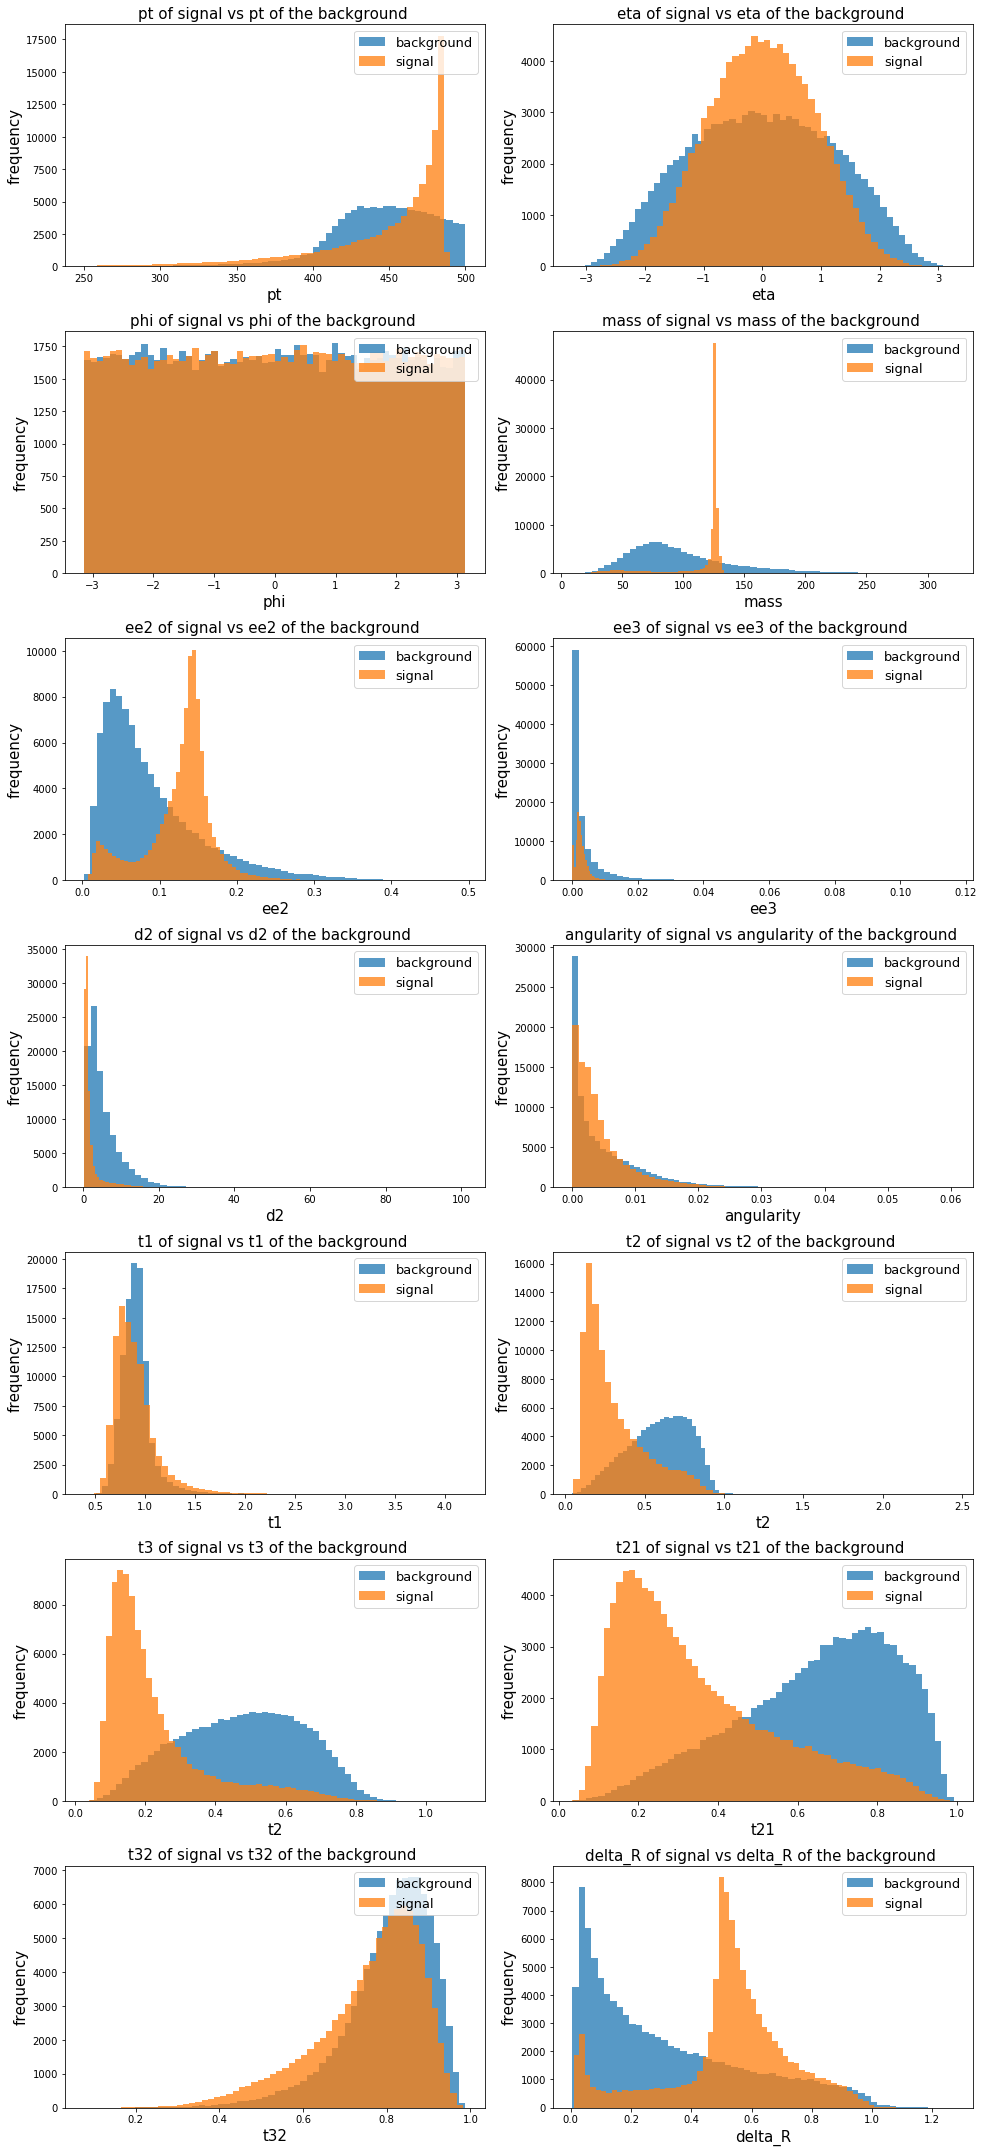

In [223]:
fig, axes = plt.subplots(7,2,figsize=(14,30))

alpha_n = 0.75
bin_size = 60
size = 15
leg_size = 13

axes[0,0].hist(pt_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,0].hist(pt,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,0].set_xlabel('pt', fontsize = size)
axes[0,0].set_ylabel('frequency', fontsize = size)
axes[0,0].set_title("pt of signal vs pt of the background ", fontsize=size)
axes[0,0].legend(loc=1, fontsize=leg_size)

axes[0,1].hist(eta_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,1].hist(eta, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,1].set_xlabel('eta', fontsize=size)
axes[0,1].set_ylabel('frequency', fontsize=size)
axes[0,1].set_title("eta of signal vs eta of the background ", fontsize=size)
axes[0,1].legend(loc=1, fontsize=leg_size)

axes[1,0].hist(phi_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,0].hist(phi, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,0].set_xlabel('phi', fontsize=size)
axes[1,0].set_ylabel('frequency', fontsize=size)
axes[1,0].set_title("phi of signal vs phi of the background ", fontsize=size)
axes[1,0].legend(loc=1, fontsize=leg_size)

axes[1,1].hist(mass_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,1].hist(mass,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,1].set_xlabel('mass', fontsize=size)
axes[1,1].set_ylabel('frequency', fontsize=size)
axes[1,1].set_title("mass of signal vs mass of the background ", fontsize=size)
axes[1,1].legend(loc=1, fontsize=leg_size)

axes[2,0].hist(ee2_bkg,label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,0].hist(ee2,label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,0].set_xlabel('ee2', fontsize=size)
axes[2,0].set_ylabel('frequency', fontsize=size)
axes[2,0].set_title("ee2 of signal vs ee2 of the background ", fontsize=size)
axes[2,0].legend(loc=1, fontsize=leg_size)

axes[2,1].hist(ee3_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,1].hist(ee3, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,1].set_xlabel('ee3', fontsize=size)
axes[2,1].set_ylabel('frequency', fontsize=size)
axes[2,1].set_title("ee3 of signal vs ee3 of the background ", fontsize=size)
axes[2,1].legend(loc=1, fontsize=leg_size)

axes[3,0].hist(d2_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,0].hist(d2, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,0].set_xlabel('d2', fontsize=size)
axes[3,0].set_ylabel('frequency', fontsize=size)
axes[3,0].set_title("d2 of signal vs d2 of the background ", fontsize=size)
axes[3,0].legend(loc=1, fontsize=leg_size)

axes[3,1].hist(angularity_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,1].hist(angularity, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,1].set_xlabel('angularity', fontsize=size)
axes[3,1].set_ylabel('frequency', fontsize=size)
axes[3,1].set_title("angularity of signal vs angularity of the background ", fontsize=size)
axes[3,1].legend(loc=1, fontsize=leg_size)

axes[4,0].hist(t1_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,0].hist(t1, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,0].set_xlabel('t1', fontsize=size)
axes[4,0].set_ylabel('frequency', fontsize=size)
axes[4,0].set_title("t1 of signal vs t1 of the background ", fontsize=size)
axes[4,0].legend(loc=1, fontsize=leg_size)

axes[4,1].hist(t2_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,1].hist(t2, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,1].set_xlabel('t2', fontsize=size)
axes[4,1].set_ylabel('frequency', fontsize=size)
axes[4,1].set_title("t2 of signal vs t2 of the background ", fontsize=size)
axes[4,1].legend(loc=1, fontsize=leg_size)

axes[5,0].hist(t3_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,0].hist(t3, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,0].set_xlabel('t2', fontsize=size)
axes[5,0].set_ylabel('frequency', fontsize=size)
axes[5,0].set_title("t3 of signal vs t3 of the background ", fontsize=size)
axes[5,0].legend(loc=1, fontsize=leg_size)

axes[5,1].hist(t21_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,1].hist(t21, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,1].set_xlabel('t21', fontsize=size)
axes[5,1].set_ylabel('frequency', fontsize=size)
axes[5,1].set_title("t21 of signal vs t21 of the background ", fontsize=size)
axes[5,1].legend(loc=1, fontsize=leg_size)

axes[6,0].hist(t32_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,0].hist(t32, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,0].set_xlabel('t32', fontsize=size)
axes[6,0].set_ylabel('frequency', fontsize=size)
axes[6,0].set_title("t32 of signal vs t32 of the background ", fontsize=size)
axes[6,0].legend(loc=1, fontsize=leg_size)

axes[6,1].hist(delta_R_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,1].hist(delta_R, label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,1].set_xlabel('delta_R', fontsize=size)
axes[6,1].set_ylabel('frequency', fontsize=size)
axes[6,1].set_title("delta_R of signal vs delta_R of the background ", fontsize=size)
axes[6,1].legend(loc=1, fontsize=leg_size)

fig.tight_layout()

Without any event selection, it seems like t2 can be a good candidate for an alternative discriminatory factor. It is worth calculating the signal significance using this parameter.


### Calculate the signal significance using t2.

The mean value of the t2 =  0.14692611774889436


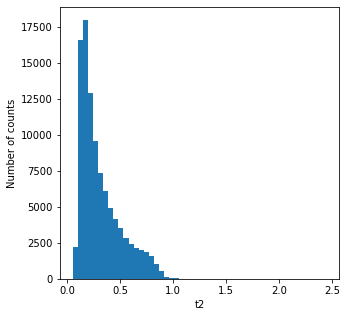

In [224]:
plt.rcParams["figure.figsize"] = (5,5)
n,b, patches = plt.hist(t2, 50)
plt.xlabel('t2', fontsize=10)
plt.ylabel('Number of counts', fontsize=10)

bin_max = np.where(n == n.max())

print('The mean value of the t2 = ', b[bin_max][0]);

In [225]:
mean_value = b[bin_max][0]
n = 0.05
n_left = mean_value - n
n_right = mean_value + n

t2_cut = np.zeros(0,dtype=int) 
t2_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if t2[i]> n_left and t2[i] < n_right :
        t2_cut = np.append(t2_cut, t2[i])
        
for i in range(0, t2_bkg.size):
    if t2_bkg[i]> n_left and t2_bkg[i] < n_right :
        t2_bkg_cut = np.append(t2_bkg_cut, t2_bkg[i])

In [226]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = t2_cut.size * (N_higgs/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = t2_bkg_cut.size * (N_qcd/mass_bkg.size)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 35.60
The new expected yield number of qcd event = 467.60

The significance after the 1st cut = 1.65


By using t2 feature to cut the data, the signal signifcance improved from the original 0.71 to 1.65. It shows that different features can be used as a discriminatory feature.

### Finding an additional feature to improve the expected significance after the optimal mass cut

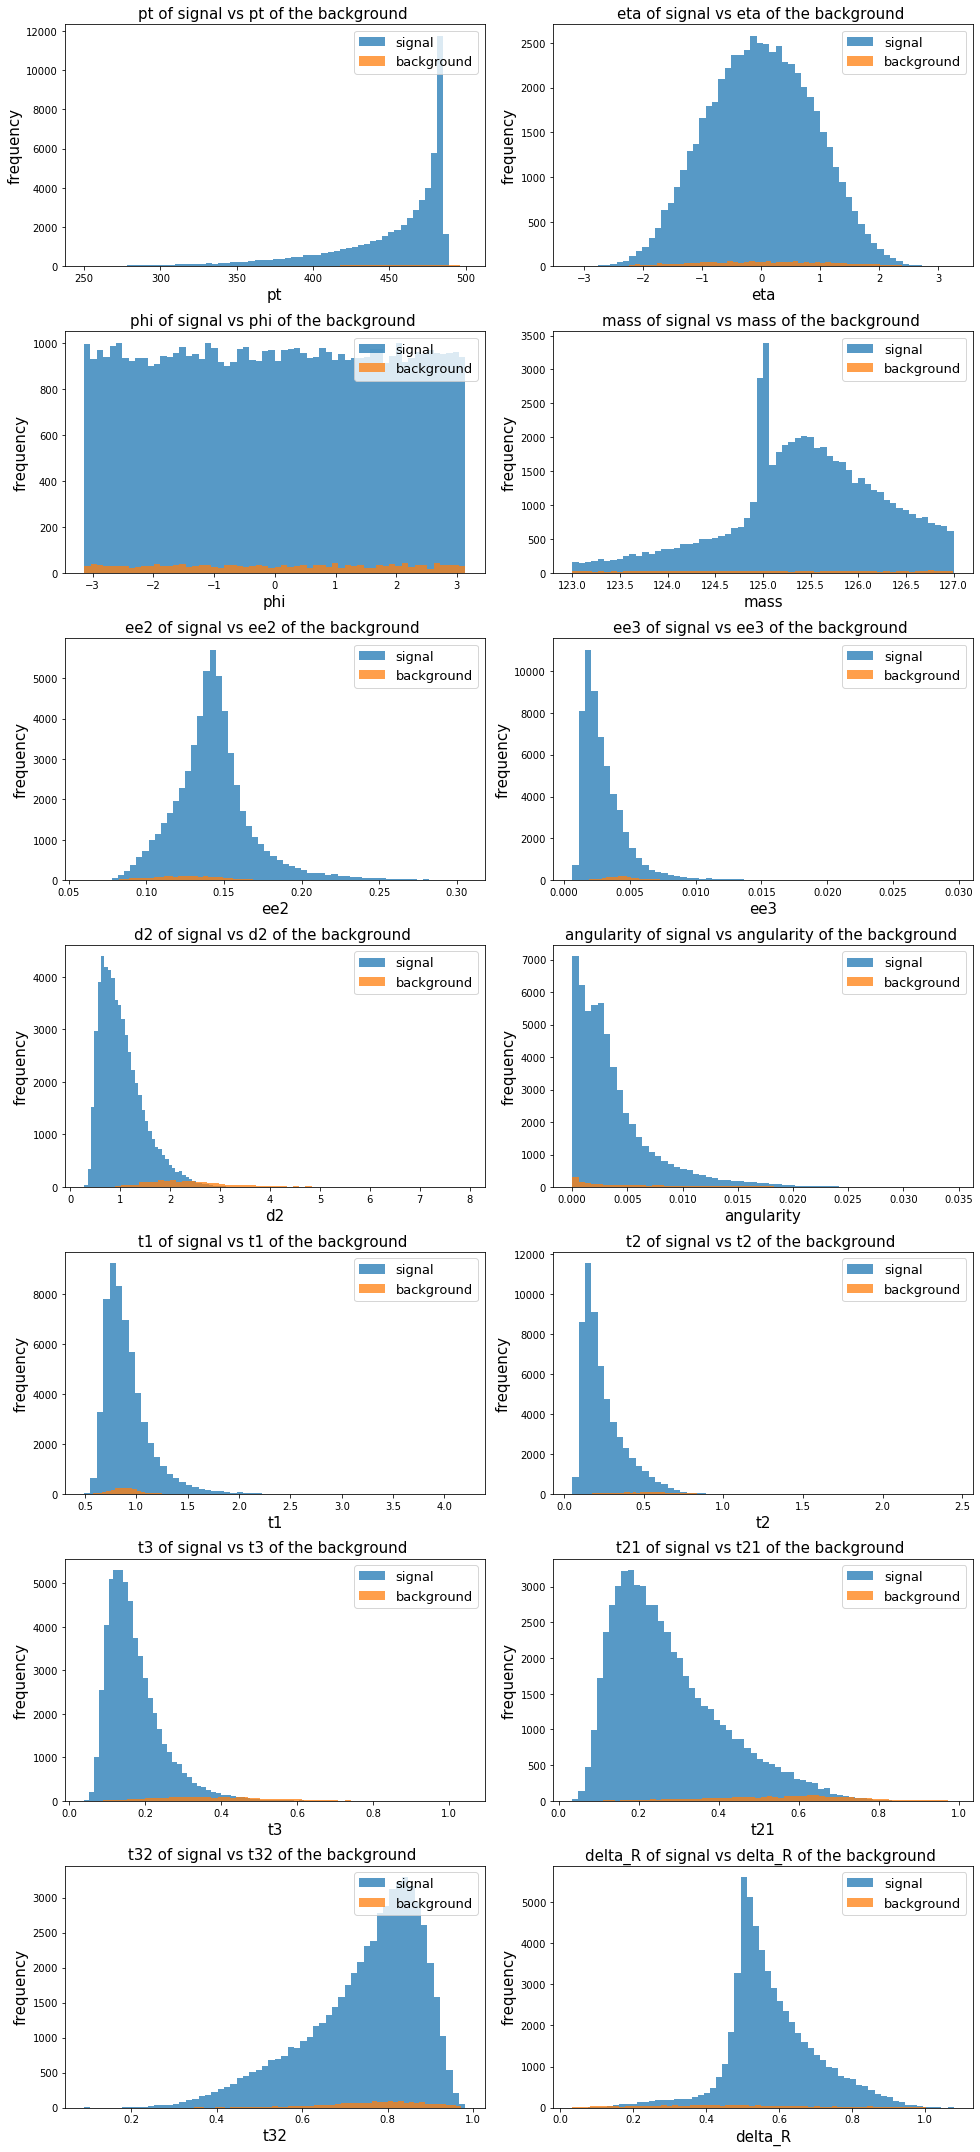

In [227]:
fig, axes = plt.subplots(7,2,figsize=(14,30))

alpha_n = 0.75
bin_size = 60
size = 15
leg_size = 13


axes[0,0].hist(pt[index],label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,0].hist(pt_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,0].set_xlabel('pt', fontsize = size)
axes[0,0].set_ylabel('frequency', fontsize = size)
axes[0,0].set_title("pt of signal vs pt of the background ", fontsize=size)
axes[0,0].legend(loc=1, fontsize=leg_size)

axes[0,1].hist(eta[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[0,1].hist(eta_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[0,1].set_xlabel('eta', fontsize=size)
axes[0,1].set_ylabel('frequency', fontsize=size)
axes[0,1].set_title("eta of signal vs eta of the background ", fontsize=size)
axes[0,1].legend(loc=1, fontsize=leg_size)

axes[1,0].hist(phi[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,0].hist(phi_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,0].set_xlabel('phi', fontsize=size)
axes[1,0].set_ylabel('frequency', fontsize=size)
axes[1,0].set_title("phi of signal vs phi of the background ", fontsize=size)
axes[1,0].legend(loc=1, fontsize=leg_size)

axes[1,1].hist(mass[index],label = 'signal', bins = bin_size, alpha=alpha_n)
axes[1,1].hist(mass_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[1,1].set_xlabel('mass', fontsize=size)
axes[1,1].set_ylabel('frequency', fontsize=size)
axes[1,1].set_title("mass of signal vs mass of the background ", fontsize=size)
axes[1,1].legend(loc=1, fontsize=leg_size)

axes[2,0].hist(ee2[index],label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,0].hist(ee2_bkg[index_bkg],label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,0].set_xlabel('ee2', fontsize=size)
axes[2,0].set_ylabel('frequency', fontsize=size)
axes[2,0].set_title("ee2 of signal vs ee2 of the background ", fontsize=size)
axes[2,0].legend(loc=1, fontsize=leg_size)

axes[2,1].hist(ee3[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[2,1].hist(ee3_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[2,1].set_xlabel('ee3', fontsize=size)
axes[2,1].set_ylabel('frequency', fontsize=size)
axes[2,1].set_title("ee3 of signal vs ee3 of the background ", fontsize=size)
axes[2,1].legend(loc=1, fontsize=leg_size)

axes[3,0].hist(d2[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,0].hist(d2_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,0].set_xlabel('d2', fontsize=size)
axes[3,0].set_ylabel('frequency', fontsize=size)
axes[3,0].set_title("d2 of signal vs d2 of the background ", fontsize=size)
axes[3,0].legend(loc=1, fontsize=leg_size)

axes[3,1].hist(angularity[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[3,1].hist(angularity_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[3,1].set_xlabel('angularity', fontsize=size)
axes[3,1].set_ylabel('frequency', fontsize=size)
axes[3,1].set_title("angularity of signal vs angularity of the background ", fontsize=size)
axes[3,1].legend(loc=1, fontsize=leg_size)

axes[4,0].hist(t1[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,0].hist(t1_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,0].set_xlabel('t1', fontsize=size)
axes[4,0].set_ylabel('frequency', fontsize=size)
axes[4,0].set_title("t1 of signal vs t1 of the background ", fontsize=size)
axes[4,0].legend(loc=1, fontsize=leg_size)

axes[4,1].hist(t2[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[4,1].hist(t2_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[4,1].set_xlabel('t2', fontsize=size)
axes[4,1].set_ylabel('frequency', fontsize=size)
axes[4,1].set_title("t2 of signal vs t2 of the background ", fontsize=size)
axes[4,1].legend(loc=1, fontsize=leg_size)

axes[5,0].hist(t3[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,0].hist(t3_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,0].set_xlabel('t3', fontsize=size)
axes[5,0].set_ylabel('frequency', fontsize=size)
axes[5,0].set_title("t3 of signal vs t3 of the background ", fontsize=size)
axes[5,0].legend(loc=1, fontsize=leg_size)

axes[5,1].hist(t21[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[5,1].hist(t21_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[5,1].set_xlabel('t21', fontsize=size)
axes[5,1].set_ylabel('frequency', fontsize=size)
axes[5,1].set_title("t21 of signal vs t21 of the background ", fontsize=size)
axes[5,1].legend(loc=1, fontsize=leg_size)

axes[6,0].hist(t32[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,0].hist(t32_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,0].set_xlabel('t32', fontsize=size)
axes[6,0].set_ylabel('frequency', fontsize=size)
axes[6,0].set_title("t32 of signal vs t32 of the background ", fontsize=size)
axes[6,0].legend(loc=1, fontsize=leg_size)

axes[6,1].hist(delta_R[index], label = 'signal', bins = bin_size, alpha=alpha_n)
axes[6,1].hist(delta_R_bkg[index_bkg], label = 'background', bins = bin_size, alpha=alpha_n)
axes[6,1].set_xlabel('delta_R', fontsize=size)
axes[6,1].set_ylabel('frequency', fontsize=size)
axes[6,1].set_title("delta_R of signal vs delta_R of the background ", fontsize=size)
axes[6,1].legend(loc=1, fontsize=leg_size)

fig.tight_layout()

Without any event selection, t2 seemed liked a good discriminatory feature but after taking into account the first cut of data using mass as the discriminatory feature d2 looks even better as an additional discriminatory feature.

### Using Multiple features to optimize event selections: Mass and d2

The mean value of the d2 =  0.600146421539512


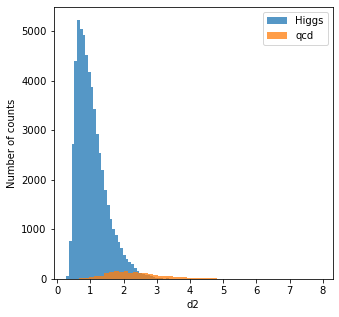

In [228]:
plt.rcParams["figure.figsize"] = (5,5)

n,b, patches = plt.hist(d2[index], 50, alpha = 0.76,label = "Higgs")
plt.hist(d2_bkg[index_bkg],50, alpha = 0.76, label = "qcd")

plt.xlabel('d2', fontsize=10)
plt.ylabel('Number of counts', fontsize=10)
plt.legend()

bin_max = np.where(n == n.max())

print('The mean value of the d2 = ', b[bin_max][0]);

In [229]:

n_left = 0
n_right = 0.7

d2_masscut =  d2[index]
d2_bkg_masscut =  d2_bkg[index_bkg]

d2_cut = np.zeros(0,dtype=int) 
d2_bkg_cut = np.zeros(0,dtype=int) 

for i in d2_masscut:
    if i > n_left and i < n_right :
        d2_cut = np.append(d2_cut, i)
        
for j in d2_bkg_masscut:
    if j > n_left and j < n_right :
        d2_bkg_cut = np.append(d2_bkg_cut, j)


In [70]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance

N_higgs_cut = d2_cut.size * (N_higgs/100000)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = d2_bkg_cut.size * (N_qcd/100000)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after multiple cuts using Mass and d2 = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 14.33
The new expected yield number of qcd event = 1.00

The significance after multiple cuts using Mass and d2 = 14.33


Although we used a different set of data, it shows that Mass and t2, in both cases, work as a very good discrimantory features. My partner's signal significance improved from 1.83 to 14.16 after using these two features and making multiple cuts to the data. It definitely shows that using multiple features can make further improvements to the signal significance.

# LAB 8

### Importing pseudo data

In [71]:
# importing the data file
data_highLumi = pd.read_hdf("data_highLumi_pt_250_500.h5")

f1 = h5py.File("data_highLumi_pt_250_500.h5", 'r')
data_highLumi = f1.get('data').get('block0_values')

In [72]:
# importing the data file
data_lowLumi = pd.read_hdf("data_lowLumi_pt_250_500.h5")
#print(data_lowLumi);

f2 = h5py.File("data_lowLumi_pt_250_500.h5", 'r')
data_lowLumi = f2.get('data').get('block0_values')

### Importing training data

In [73]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile2)

# High luminosity data
In the previous section, we have picked out two good discriminatory features: mass and t2. For these pseudo data, we will focus on these two features. First, a histogram is made to compare the pseudo data with the expected signal and background to see behavior differences in these data.

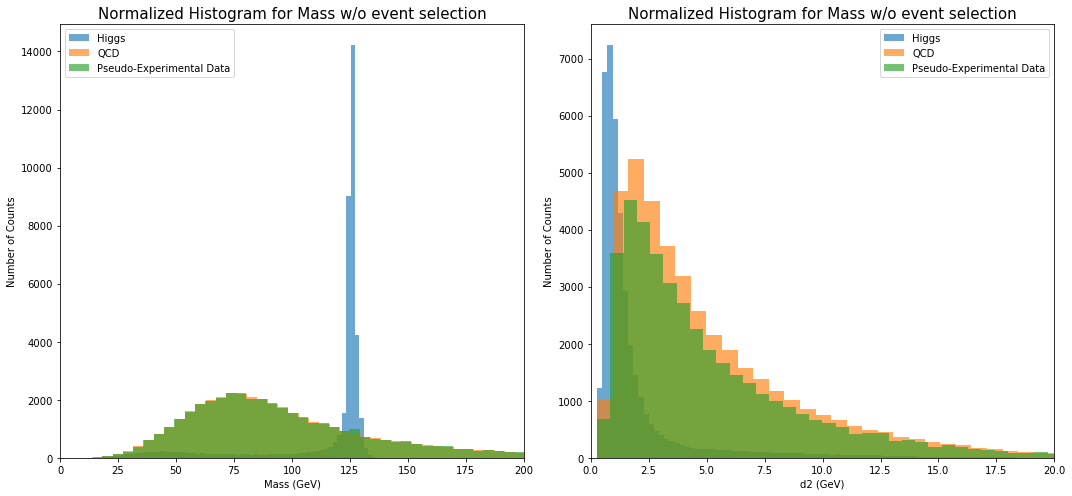

In [196]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

alpha = 0.65
bin = 70
size = 15

a = data_highLumi[:,3]
weight = np.full(100000, a.size/100000)

axes[0].hist(mass, bins = bin , weights = weight, label='Higgs', alpha = alpha)
axes[0].hist(mass_bkg,bins = bin, weights = weight, label='QCD', alpha = alpha)
axes[0].hist(data_highLumi[:, 3], bins = bin, alpha = alpha, label='Pseudo-Experimental Data',)
axes[0].set_ylabel("Number of Counts")
axes[0].set_xlabel("Mass (GeV)")
axes[0].set_xlim(0,200)
axes[0].set_title("Normalized Histogram for Mass w/o event selection",fontsize=size)
axes[0].legend()

axes[1].hist(d2,bins = 150, weights = weight, label='Higgs', alpha = alpha)
axes[1].hist(d2_bkg, bins = 150 , weights = weight,label='QCD', alpha = alpha)
axes[1].hist(data_highLumi[:, 6], bins = 150, alpha = alpha, label='Pseudo-Experimental Data',)
axes[1].set_ylabel("Number of Counts")
axes[1].set_xlabel("d2 (GeV)")
axes[1].set_xlim(0,20)
axes[1].set_title("Normalized Histogram for Mass w/o event selection",fontsize=size)
axes[1].legend()

fig.tight_layout()
plt.show()

In [230]:
N_highL = data_highLumi.size

ratio = N_higgs/np.sqrt(N_highL)
print('The significance without any event selection = {:.2f}'.format(ratio))

The significance without any event selection = 0.13


#### Make a cut using the feature Mass
We can perform another cut to the data to improve the sensitivity of the signal.

In [231]:
# Find the peak value of the signal
counts = np.bincount(mass)
print('The mean value of the mass = ',np.argmax(counts))

The mean value of the mass =  125


In [234]:
# Select the interval of the cuts
mean_value = np.argmax(counts)
n = 2.5
n_left = mean_value - n
n_right = mean_value + n
mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 
mass_highL_cut = np.zeros(0,dtype=int) 
index = np.zeros(0,dtype=int) 
index_bkg = np.zeros(0,dtype=int) 
index_highL = np.zeros(0,dtype=int) 

mass_highL = data_highLumi[:, 3]

# Look through the data set to make the cut
for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        index = np.append(index, i)
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])
        index_bkg = np.append(index_bkg, i)
        
for i in range(0, mass_highL.size):
    if mass_highL[i] > n_left and mass_highL[i] < n_right :
        mass_highL_cut = np.append(mass_highL_cut, mass_highL[i])
        index_highL = np.append(index_highL, i)


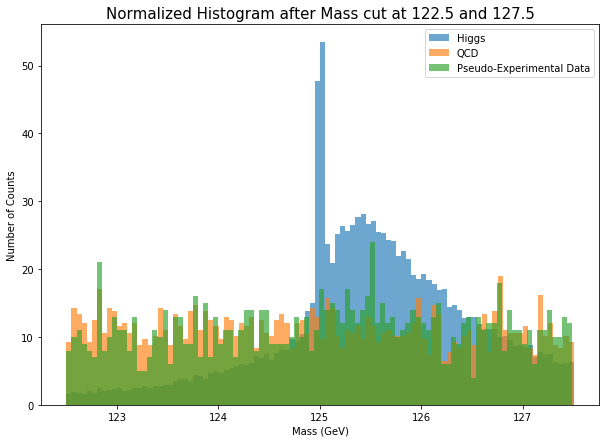

In [235]:
plt.figure(figsize=(10,7))
alpha = 0.65
bin = 100
size = 15

weight1 = np.full(mass_cut.size , mass_highL_cut.size/mass_cut.size)
weight2 = np.full(mass_bkg_cut.size, mass_highL_cut.size/mass_bkg_cut.size)

plt.hist(mass_cut, bins = bin , weights = weight1, label='Higgs', alpha = alpha)
plt.hist(mass_bkg_cut,bins = bin, weights = weight2, label='QCD', alpha = alpha)
plt.hist(mass_highL_cut, bins = bin, alpha = alpha, label='Pseudo-Experimental Data',)

plt.ylabel("Number of Counts")
plt.xlabel("Mass (GeV)")
plt.title("Normalized Histogram after Mass cut at 122.5 and 127.5",fontsize=size)
plt.legend()
plt.show()

The above histogram shows what how signal, background and the pseudo data compare to each other after making a cut based on the mass value of 122.5 and 127.5. Compared to the original data, you can see that there is an improvement in the signal sensitivity.

#### The signal significance after using Mass as a feature to cut the data

In [236]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs = 100
N_qcd = 20000

N_higgs_cut = mass_cut.size * (N_higgs/mass.size)
print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_highL_cut.size * (N_qcd/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 61.94
The new expected yield number of qcd event = 226.20
The significance after the 1st cut = 4.12


The signal significance after the data cut is 4.12 sigma.  However, we can use another discriminatory feature to further improve the significance. We are going to use the feature t2 to make additional cut.

The mean value of the d2 =  0.600146421539512


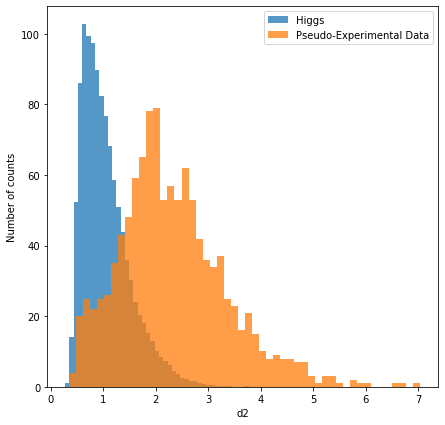

In [237]:
plt.rcParams["figure.figsize"] = (7,7)
d2_highL = data_highLumi[:, 6]

weight1 = np.full(d2[index].size , d2_highL[index_highL].size/d2[index].size)
weight2 = np.full(d2_bkg[index_bkg].size, d2_highL[index_highL].size/d2_bkg[index_bkg].size)

n,b, patches = plt.hist(d2[index], 50, weights = weight1, alpha = 0.76,label = "Higgs")
#plt.hist(d2_bkg[index_bkg],50, alpha = 0.76, weights = weight2, label = "qcd")
plt.hist(d2_highL[index_highL],50, alpha = 0.76, label = "Pseudo-Experimental Data")

plt.xlabel('d2', fontsize=10)
plt.ylabel('Number of counts', fontsize=10)
plt.legend()

bin_max = np.where(n == n.max())

print('The mean value of the d2 = ', b[bin_max][0]);

In [238]:
n_left = 0
n_right = 1.2

d2_masscut =  d2[index]
d2_bkg_masscut =  d2_bkg[index_bkg]
d2_highL_masscut = d2_highL[index_highL]

d2_cut = np.zeros(0,dtype=int) 
d2_bkg_cut = np.zeros(0,dtype=int) 
d2_highL_cut = np.zeros(0,dtype=int)

for i in d2_masscut:
    if i > n_left and i < n_right :
        d2_cut = np.append(d2_cut, i)
        
for j in d2_bkg_masscut:
    if j > n_left and j < n_right :
        d2_bkg_cut = np.append(d2_bkg_cut, j)

for k in d2_highL_masscut:
    if k > n_left and k < n_right :
        d2_highL_cut = np.append(d2_highL_cut, k)


In [239]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance

N_higgs_cut = d2_cut.size * (N_higgs/100000)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = d2_highL_cut.size * (N_qcd/100000)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after multiple cuts using Mass and d2 = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 43.47
The new expected yield number of qcd event = 26.60

The significance after multiple cuts using Mass and d2 = 8.43


The signal significance improved further from 4.12 to 8.43 using the feature t2. We started out with a signal significance of 0.13 without any event selection. 

# Low luminosity data

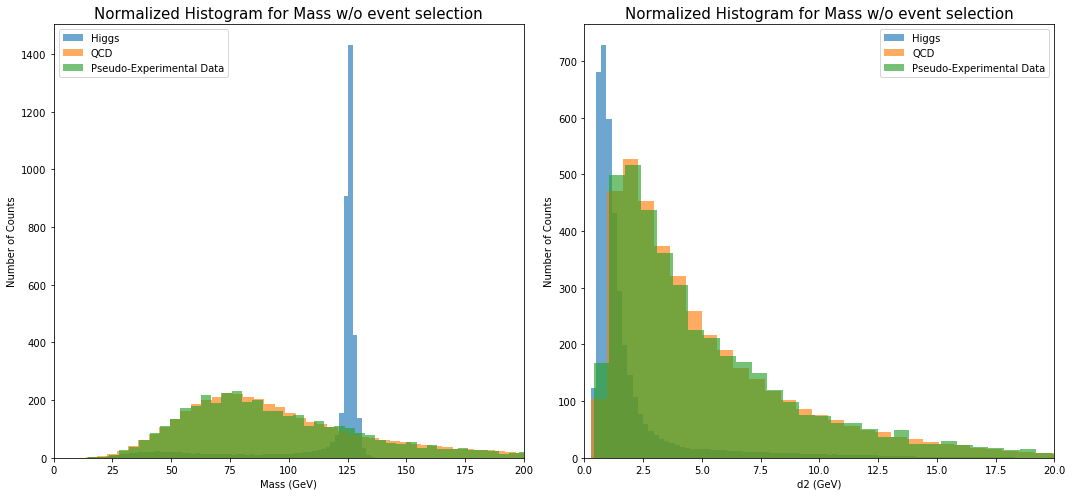

In [240]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

alpha = 0.65
bin = 70
size = 15

a = data_lowLumi[:,3]
weight = np.full(100000, a.size/100000)

axes[0].hist(mass, bins = bin , weights = weight, label='Higgs', alpha = alpha)
axes[0].hist(mass_bkg,bins = bin, weights = weight, label='QCD', alpha = alpha)
axes[0].hist(data_lowLumi[:, 3], bins = bin, alpha = alpha, label='Pseudo-Experimental Data',)
axes[0].set_ylabel("Number of Counts")
axes[0].set_xlabel("Mass (GeV)")
axes[0].set_xlim(0,200)
axes[0].set_title("Normalized Histogram for Mass w/o event selection",fontsize=size)
axes[0].legend()

axes[1].hist(d2,bins = 150, weights = weight, label='Higgs', alpha = alpha)
axes[1].hist(d2_bkg, bins = 150 , weights = weight,label='QCD', alpha = alpha)
axes[1].hist(data_lowLumi[:, 6], bins = 150, alpha = alpha, label='Pseudo-Experimental Data',)
axes[1].set_ylabel("Number of Counts")
axes[1].set_xlabel("d2 (GeV)")
axes[1].set_xlim(0,20)
axes[1].set_title("Normalized Histogram for Mass w/o event selection",fontsize=size)
axes[1].legend()

fig.tight_layout()
plt.show()

In [241]:
N_lowL = data_lowLumi.size

ratio = N_higgs/np.sqrt(N_lowL)
print('The significance without any event selection = {:.2f}'.format(ratio))

The significance without any event selection = 0.42


#### Make a cut using the feature Mass

In [242]:
counts = np.bincount(mass)
print('The mean value of the mass = ',np.argmax(counts))

The mean value of the mass =  125


In [243]:
mean_value = np.argmax(counts)
n = 2.5
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 
mass_lowL_cut = np.zeros(0,dtype=int) 
index = np.zeros(0,dtype=int) 
index_bkg = np.zeros(0,dtype=int) 
index_lowL = np.zeros(0,dtype=int) 

mass_lowL = data_lowLumi[:, 3]

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        index = np.append(index, i)
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])
        index_bkg = np.append(index_bkg, i)
        
for i in range(0, mass_lowL.size):
    if mass_lowL[i] > n_left and mass_lowL[i] < n_right :
        mass_lowL_cut = np.append(mass_lowL_cut, mass_lowL[i])
        index_lowL = np.append(index_lowL, i)



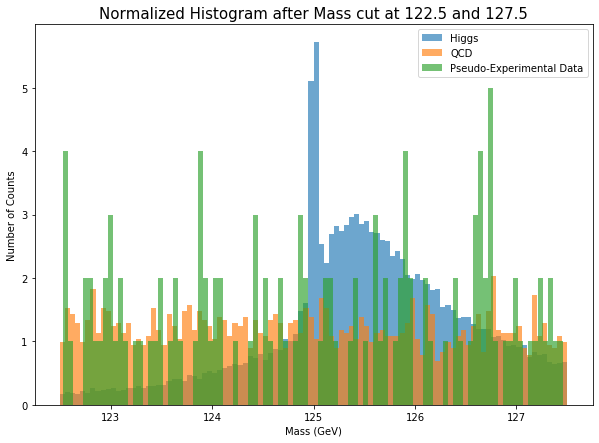

In [244]:
plt.figure(figsize=(10,7))
alpha = 0.65
bin = 100
size = 15

weight1 = np.full(mass_cut.size , mass_lowL_cut.size/mass_cut.size)
weight2 = np.full(mass_bkg_cut.size, mass_lowL_cut.size/mass_bkg_cut.size)

plt.hist(mass_cut, bins = bin , weights = weight1, label='Higgs', alpha = alpha)
plt.hist(mass_bkg_cut,bins = bin, weights = weight2, label='QCD', alpha = alpha)
plt.hist(mass_lowL_cut, bins = bin, alpha = alpha, label='Pseudo-Experimental Data',)

plt.ylabel("Number of Counts")
plt.xlabel("Mass (GeV)")
plt.title("Normalized Histogram after Mass cut at 122.5 and 127.5",fontsize=size)
plt.legend()
plt.show()

#### The signal significance after using Mass as a feature to cut the data

In [245]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs = 100
N_qcd = 20000

N_higgs_cut = mass_cut.size * (N_higgs/mass.size)
print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = mass_lowL_cut.size * (N_qcd/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 61.94
The new expected yield number of qcd event = 24.20
The significance after the 1st cut = 12.59


The mean value of the d2 =  0.600146421539512


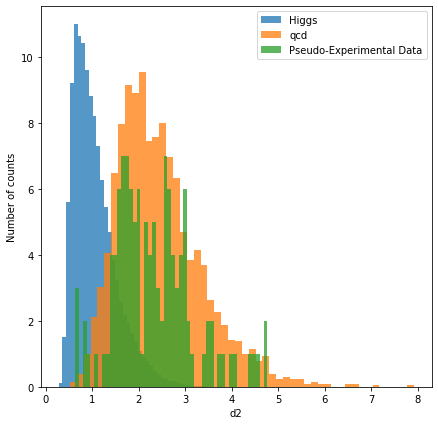

In [246]:
plt.rcParams["figure.figsize"] = (7,7)
d2_lowL = data_lowLumi[:, 6]

weight1 = np.full(d2[index].size , d2_lowL[index_lowL].size/d2[index].size)
weight2 = np.full(d2_bkg[index_bkg].size, d2_lowL[index_lowL].size/d2_bkg[index_bkg].size)

n,b, patches = plt.hist(d2[index], 50, weights = weight1, alpha = 0.76,label = "Higgs")
plt.hist(d2_bkg[index_bkg],50, alpha = 0.76, weights = weight2, label = "qcd")
plt.hist(d2_lowL[index_lowL],50, alpha = 0.76, label = "Pseudo-Experimental Data")

plt.xlabel('d2', fontsize=10)
plt.ylabel('Number of counts', fontsize=10)
plt.legend()

bin_max = np.where(n == n.max())

print('The mean value of the d2 = ', b[bin_max][0]);

In [247]:
n_left = 0
n_right = 1.2

d2_masscut =  d2[index]
d2_bkg_masscut =  d2_bkg[index_bkg]
d2_lowL_masscut = d2_lowL[index_lowL]

d2_cut = np.zeros(0,dtype=int) 
d2_bkg_cut = np.zeros(0,dtype=int) 
d2_lowL_cut = np.zeros(0,dtype=int)

for i in d2_masscut:
    if i > n_left and i < n_right :
        d2_cut = np.append(d2_cut, i)
        
for j in d2_bkg_masscut:
    if j > n_left and j < n_right :
        d2_bkg_cut = np.append(d2_bkg_cut, j)

for k in d2_lowL_masscut:
    if k > n_left and k < n_right:
        d2_lowL_cut = np.append(d2_lowL_cut, k)

In [248]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance

N_higgs_cut = d2_cut.size * (N_higgs/100000)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = d2_lowL_cut.size * (N_qcd/100000)

print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/np.sqrt(N_qcd_cut)
print('The significance after multiple cuts using Mass and d2 = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 43.47
The new expected yield number of qcd event = 1.40

The significance after multiple cuts using Mass and d2 = 36.74


The signal significance improved further from 12.59 to 36.74 using the feature t2. We started out with a signal significance of 0.42 without any event selection. 

### 95% Confidence Level of signal yields


In [249]:
N_pseudo = data_lowLumi.size

ratio = N_higgs_cut/np.sqrt(N_pseudo)
print('The significance of low luminosity data = {:.2f}'.format(ratio))

The significance of low luminosity data = 0.18


#### 95% confidence level upper limit for observed data

The mean value of the pseudo data =  75.75299511015089


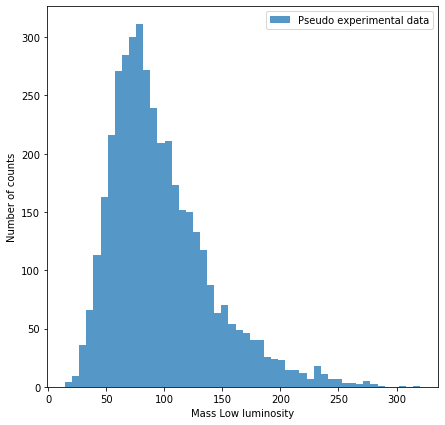

In [250]:
n,b, patches = plt.hist(mass_lowL, 50, alpha = 0.76,label = "Pseudo experimental data")

plt.xlabel('Mass Low luminosity', fontsize=10)
plt.ylabel('Number of counts', fontsize=10)
plt.legend()

bin_max = np.where(n == n.max())
mean_value = b[bin_max][0]

print('The mean value of the pseudo data = ', mean_value);

In [251]:
# Calculate the confidence interval
n_left = 0
n_right = 182.25

mass_count = 0

for i in range(0, mass_lowL.size):
    if mass_lowL[i] > n_left and mass_lowL[i] < n_right :
       mass_count = mass_count + 1
percentage = mass_count/mass_lowL.size

In [192]:
print('The confidence level is = {:.2%}'.format(percentage))
print('The 95% confidence level upper limit of sinal yield is', n_right)

The confidence level is = 95.00%
The 95% confidence level upper limit of sinal yield is 182.25


#### 95% confidence level upper limit for expected yields

In [252]:
# Calculate the confidence interval
counts = np.bincount(mass)
mean_value = np.argmax(counts)


n = 79.2
n_left = mean_value - n
n_right = mean_value + n

mass_count = 0

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
       mass_count = mass_count + 1

percentage = mass_count/mass.size
print('The confidence level is = {:.2%}'.format(percentage))
print('The 95% confidence level upper limit of sinal yield is', n_right)

The confidence level is = 95.00%
The 95% confidence level upper limit of sinal yield is 204.2


Based on the calculation, the observed 95% confidence upper limit is 182.25 and it is lower than the expected 95%  confidence level upper limit of 204.2.